# Exam on Artificial Neural Networks (ANN)

Welcome the Artificial Neural Networks (ANN) practical exam. In this exam, you will work on a classification task to predict the outcome of incidents involving buses. You are provided with a dataset that records breakdowns and delays in bus operations. Your task is to build, train, and evaluate an ANN model.

---

## Dataset Overview

### **Dataset:**
* Just run the command under the `Load Data` section to get the data downloaded and unzipped or you can access it [here](https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing)

### **Dataset Name:** Bus Breakdown and Delays

### **Description:**  
The dataset contains records of incidents involving buses that were either running late or experienced a breakdown. Your task is to predict whether the bus was delayed or had a breakdown based on the features provided.

### **Features:**
The dataset contains the following columns:

- `School_Year`
- `Busbreakdown_ID`
- `Run_Type`
- `Bus_No`
- `Route_Number`
- `Reason`
- `Schools_Serviced`
- `Occurred_On`
- `Created_On`
- `Boro`
- `Bus_Company_Name`
- `How_Long_Delayed`
- `Number_Of_Students_On_The_Bus`
- `Has_Contractor_Notified_Schools`
- `Has_Contractor_Notified_Parents`
- `Have_You_Alerted_OPT`
- `Informed_On`
- `Incident_Number`
- `Last_Updated_On`
- `Breakdown_or_Running_Late` (Target Column)
- `School_Age_or_PreK`

## Load Data

In [109]:
#https://drive.google.com/file/d/1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-/view?usp=sharing
!pip install gdown
!gdown --id 1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Failed to retrieve file url:

	Too many users have viewed or downloaded this file recently. Please
	try accessing the file again later. If the file you are trying to
	access is particularly large or is shared with many people, it may
	take up to 24 hours to be able to view or download the file. If you
	still can't access a file after 24 hours, contact your domain
	administrator.

You may still be able to access the file from the browser:

	https://drive.google.com/uc?id=1Flvj3qDkV2rPw7GGi5zOR-WGJgEBtRk-

but Gdown can't. Please check connections and permissions.


## Importing Libraries

In [110]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

## Exploratory Data Analysis (EDA)
This could include:
* **Inspect the dataset**

* **Dataset structure**

* **Summary statistics**

* **Check for missing values**

* **Distribution of features**

* **Categorical feature analysis**

* **Correlation matrix**

* **Outlier detection**

And add more as needed!

In [111]:
df = pd.read_csv("Bus_Breakdown_and_Delays.csv")

In [112]:
df.head()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
0,2015-2016,1224901,Pre-K/EI,811,1,Other,C353,10/26/2015 08:30:00 AM,10/26/2015 08:40:00 AM,Bronx,...,10MINUTES,5,Yes,Yes,No,10/26/2015 08:40:00 AM,NaN,10/26/2015 08:40:39 AM,Running Late,Pre-K
1,2015-2016,1225098,Pre-K/EI,9302,1,Heavy Traffic,C814,10/27/2015 07:10:00 AM,10/27/2015 07:11:00 AM,Bronx,...,25 MINUTES,3,Yes,Yes,No,10/27/2015 07:11:00 AM,NaN,10/27/2015 07:11:22 AM,Running Late,Pre-K
2,2015-2016,1215800,Pre-K/EI,358,2,Heavy Traffic,C195,09/18/2015 07:36:00 AM,09/18/2015 07:38:00 AM,Bronx,...,15 MINUTES,12,Yes,Yes,Yes,09/18/2015 07:38:00 AM,NaN,09/18/2015 07:38:44 AM,Running Late,Pre-K
3,2015-2016,1215511,Pre-K/EI,331,2,Other,C178,09/17/2015 08:08:00 AM,09/17/2015 08:12:00 AM,Bronx,...,10 minutes,11,Yes,Yes,Yes,09/17/2015 08:12:00 AM,NaN,09/17/2015 08:12:08 AM,Running Late,Pre-K
4,2015-2016,1215828,Pre-K/EI,332,2,Other,S176,09/18/2015 07:39:00 AM,09/18/2015 07:45:00 AM,Bronx,...,10MINUTES,12,Yes,Yes,No,09/18/2015 07:45:00 AM,NaN,09/18/2015 07:56:40 AM,Running Late,Pre-K


In [113]:
df.tail()

,School_Year,Busbreakdown_ID,Run_Type,Bus_No,Route_Number,Reason,Schools_Serviced,Occurred_On,Created_On,Boro,...,How_Long_Delayed,Number_Of_Students_On_The_Bus,Has_Contractor_Notified_Schools,Has_Contractor_Notified_Parents,Have_You_Alerted_OPT,Informed_On,Incident_Number,Last_Updated_On,Breakdown_or_Running_Late,School_Age_or_PreK
147967,2016-2017,1338452,Pre-K/EI,9345,2,Heavy Traffic,C530,04/05/2017 08:00:00 AM,04/05/2017 08:10:00 AM,Bronx,...,15-20,7,Yes,Yes,No,04/05/2017 08:10:00 AM,NaN,04/05/2017 08:10:15 AM,Running Late,Pre-K
147968,2016-2017,1341521,Pre-K/EI,0001,5,Heavy Traffic,C579,04/24/2017 07:42:00 AM,04/24/2017 07:44:00 AM,Bronx,...,20 MINS,0,Yes,Yes,No,04/24/2017 07:44:00 AM,NaN,04/24/2017 07:44:15 AM,Running Late,Pre-K
147969,2016-2017,1353044,Special Ed PM Run,GC0112,X928,Heavy Traffic,09003,05/25/2017 04:22:00 PM,05/25/2017 04:28:00 PM,Bronx,...,20-25MINS,0,Yes,Yes,Yes,05/25/2017 04:28:00 PM,90323827,05/25/2017 04:34:36 PM,Running Late,School-Age
147970,2016-2017,1353045,Special Ed PM Run,5525D,Q920,Won`t Start,24457,05/25/2017 04:27:00 PM,05/25/2017 04:30:00 PM,Queens,...,NaN,0,Yes,Yes,No,05/25/2017 04:30:00 PM,NaN,05/25/2017 04:30:07 PM,Breakdown,School-Age
147971,2016-2017,1353046,Project Read PM Run,2530,K617,Other,21436,05/25/2017 04:36:00 PM,05/25/2017 04:37:00 PM,Brooklyn,...,45min,7,Yes,Yes,Yes,05/25/2017 04:37:00 PM,NaN,05/25/2017 04:37:37 PM,Running Late,School-Age


In [114]:
df["How_Long_Delayed"].unique()
df["How_Long_Delayed"].value_counts()


,count
How_Long_Delayed,
20 MINS,5662
30 MINS,4542
30 minutes,3650
15 mins,3522
30MINS,3199
...,...
45 MON,1
18 mins,1
146,1


there is to many unique values in How_Long_Delayed so i will drop the column

In [115]:
df.shape

(147972, 21)

In [116]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147972 entries, 0 to 147971
Data columns (total 21 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      147972 non-null  object
 1   Busbreakdown_ID                  147972 non-null  int64 
 2   Run_Type                         147883 non-null  object
 3   Bus_No                           147972 non-null  object
 4   Route_Number                     147884 non-null  object
 5   Reason                           147870 non-null  object
 6   Schools_Serviced                 147972 non-null  object
 7   Occurred_On                      147972 non-null  object
 8   Created_On                       147972 non-null  object
 9   Boro                             141654 non-null  object
 10  Bus_Company_Name                 147972 non-null  object
 11  How_Long_Delayed                 126342 non-null  object
 12  Number_Of_Studen

In [117]:
df.isna().sum()

,0
School_Year,0
Busbreakdown_ID,0
Run_Type,89
Bus_No,0
Route_Number,88
Reason,102
Schools_Serviced,0
Occurred_On,0
Created_On,0
Boro,6318


In [118]:
df = df.drop("How_Long_Delayed",axis = 1)

In [119]:
df = df.drop("Incident_Number",axis = 1)

In [120]:
df = df.drop("Created_On",axis = 1)
df = df.drop("Occurred_On",axis = 1)

In [121]:
df = df.drop("Informed_On",axis=1)
df = df.drop("Last_Updated_On", axis=1)

In [122]:
df = df.dropna()

In [123]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 141383 entries, 0 to 147971
Data columns (total 15 columns):
 #   Column                           Non-Null Count   Dtype 
---  ------                           --------------   ----- 
 0   School_Year                      141383 non-null  object
 1   Busbreakdown_ID                  141383 non-null  int64 
 2   Run_Type                         141383 non-null  object
 3   Bus_No                           141383 non-null  object
 4   Route_Number                     141383 non-null  object
 5   Reason                           141383 non-null  object
 6   Schools_Serviced                 141383 non-null  object
 7   Boro                             141383 non-null  object
 8   Bus_Company_Name                 141383 non-null  object
 9   Number_Of_Students_On_The_Bus    141383 non-null  int64 
 10  Has_Contractor_Notified_Schools  141383 non-null  object
 11  Has_Contractor_Notified_Parents  141383 non-null  object
 12  Have_You_Alerted_OPT 

In [124]:
df.duplicated().sum()

0

In [125]:
df.columns

Index(['School_Year', 'Busbreakdown_ID', 'Run_Type', 'Bus_No', 'Route_Number',
       'Reason', 'Schools_Serviced', 'Boro', 'Bus_Company_Name',
       'Number_Of_Students_On_The_Bus', 'Has_Contractor_Notified_Schools',
       'Has_Contractor_Notified_Parents', 'Have_You_Alerted_OPT',
       'Breakdown_or_Running_Late', 'School_Age_or_PreK'],
      dtype='object')

In [127]:
from sklearn.preprocessing import LabelEncoder
col = df[['School_Year', 'Run_Type', 'Bus_No', 'Route_Number',
       'Reason', 'Schools_Serviced', 'Boro', 'Bus_Company_Name',
       'Has_Contractor_Notified_Schools',
       'Has_Contractor_Notified_Parents', 'Have_You_Alerted_OPT',
       'Breakdown_or_Running_Late', 'School_Age_or_PreK']]

encoder = LabelEncoder()
for i in col:
    df[i] = encoder.fit_transform(df[i])

In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 141383 entries, 0 to 147971
Data columns (total 15 columns):
 #   Column                           Non-Null Count   Dtype
---  ------                           --------------   -----
 0   School_Year                      141383 non-null  int64
 1   Busbreakdown_ID                  141383 non-null  int64
 2   Run_Type                         141383 non-null  int64
 3   Bus_No                           141383 non-null  int64
 4   Route_Number                     141383 non-null  int64
 5   Reason                           141383 non-null  int64
 6   Schools_Serviced                 141383 non-null  int64
 7   Boro                             141383 non-null  int64
 8   Bus_Company_Name                 141383 non-null  int64
 9   Number_Of_Students_On_The_Bus    141383 non-null  int64
 10  Has_Contractor_Notified_Schools  141383 non-null  int64
 11  Has_Contractor_Notified_Parents  141383 non-null  int64
 12  Have_You_Alerted_OPT             14

## Data Preprocessing
This could include:

* **Handle Missing Values**
    * Impute missing values or drop them.

* **Encode Categorical Variables**
    * One-hot encoding
    * Label encoding

* **Scale and Normalize Data**
    * Standardization (Z-score)
    * Min-Max scaling

* **Feature Engineering**
    * Create new features
    * Feature selection

* **Handle Imbalanced Data**
    * Oversampling
    * Undersampling

* **Handle Outliers**
    * Remove outliers
    * Transform outliers

* **Remove Duplicates**
    * Remove redundant or duplicate data


And add more as needed!

Please treat these as suggestions. Feel free to use your judgment for the rest.

In [131]:
scaler = StandardScaler()
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 141383 entries, 0 to 147971
Data columns (total 15 columns):
 #   Column                           Non-Null Count   Dtype
---  ------                           --------------   -----
 0   School_Year                      141383 non-null  int64
 1   Busbreakdown_ID                  141383 non-null  int64
 2   Run_Type                         141383 non-null  int64
 3   Bus_No                           141383 non-null  int64
 4   Route_Number                     141383 non-null  int64
 5   Reason                           141383 non-null  int64
 6   Schools_Serviced                 141383 non-null  int64
 7   Boro                             141383 non-null  int64
 8   Bus_Company_Name                 141383 non-null  int64
 9   Number_Of_Students_On_The_Bus    141383 non-null  int64
 10  Has_Contractor_Notified_Schools  141383 non-null  int64
 11  Has_Contractor_Notified_Parents  141383 non-null  int64
 12  Have_You_Alerted_OPT             14

## Split the Dataset
Next, split the dataset into training, validation, and testing sets.

In [155]:
X = df.drop("Breakdown_or_Running_Late", axis=1)
y = df["Breakdown_or_Running_Late"]

X_trian_full , X_test,y_train_full,y_test = train_test_split(X,y,test_size=0.15)
X_trian , X_valid , y_train , y_valid = train_test_split(X_trian_full, y_train_full,test_size=0.15)

X_train = scaler.fit_transform(X_trian)
X_test = scaler.transform(X_test)
X_valid = scaler.transform(X_valid)
print(X_valid.shape, y_valid.shape)

(18027, 14) (18027,)


## Building the ANN Model
In this section, define the architecture of the ANN by specifying the number of layers, neurons, and activation functions.

In [143]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping

model = Sequential()
model.add(Dense(128, activation="relu",input_dim = X_train.shape[1]))
model.add(Dense(64,activation="relu"))
model.add(Dense(1, activation="sigmoid"))

early_stoping = EarlyStopping(
    monitor="val_loss",
    patience=5,
    restore_best_weights=True
)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


## Compile the Model
Compile the ANN model by defining the optimizer, loss function, and evaluation metrics.

In [144]:
model.compile(optimizer="adam",loss="binary_crossentropy", metrics=["accuracy"])

## Training the Model
Train the ANN model using the training data.

In [174]:
history = model.fit(X_train,y_train,batch_size=64,epochs=15, callbacks=early_stoping)

Epoch 1/15
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9510 - loss: 0.1214
Epoch 2/15


/usr/local/lib/python3.10/dist-packages/keras/src/callbacks/early_stopping.py:155: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)


1597/1597 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.9533 - loss: 0.1164
Epoch 3/15
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9524 - loss: 0.1179
Epoch 4/15
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9540 - loss: 0.1172
Epoch 5/15
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9536 - loss: 0.1162
Epoch 6/15
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9551 - loss: 0.1145
Epoch 7/15
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.9543 - loss: 0.1147
Epoch 8/15
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9538 - loss: 0.1167
Epoch 9/15
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9547 - loss: 0.1144
Epoch 10/15
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.9570 - loss: 0.1108
Epoch 11/15
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9551 - loss: 0.1135
Epoch 12/15
1597/1597 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9550 - loss: 0.1125
Epoch 13/15
1597/1597 ━━━━━━━━━━━━━━━━━━

## Evaluate the Model
Evaluate the performance of the model on the test set.

In [166]:
accuracy1 , loss1 = model.evaluate(X_valid,y_valid)

564/564 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9484 - loss: 0.1237


## Make Predictions
Use the trained model to make predictions on new or unseen data.

In [150]:
accuracy , loss = model.evaluate(X_test,y_test)

663/663 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9492 - loss: 0.1261


## Model Performance Visualization
Visualize the performance metrics such as accuracy and loss over the epochs.

ValueError: x and y must have same first dimension, but have shapes (1,) and (15,)

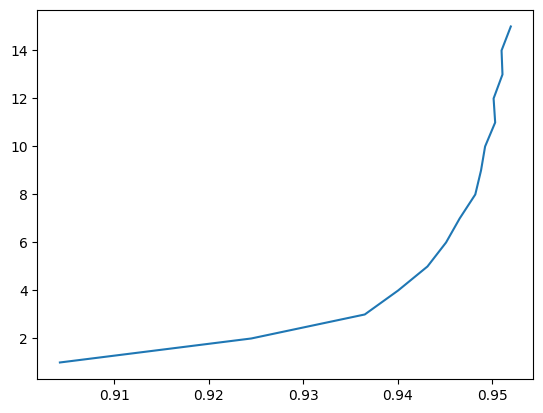

In [171]:
import matplotlib.pyplot as plt
train_acc = history.history["accuracy"]
val_acc = history.history["val_accuracy"]

epoc = range(1,16)

plt.plot(train_acc,epoc)
plt.plot(val_acc, epoc)

## Save the Model
Save the trained model for submission.

In [161]:
len(train_acc)

15

In [157]:
model.save("hamad.h5")

## Project Questions:

1. **Data Preprocessing**: Explain why you chose your specific data preprocessing techniques (e.g., normalization, encoding). How did these techniques help prepare the data for training the model?
2. **Model Architecture**: Describe the reasoning behind your model’s architecture (e.g., the number of layers, type of layers, number of neurons, and activation functions). Why did you believe this architecture was appropriate for the problem at hand?
3. **Training Process**: Discuss why you chose your batch size, number of epochs, and optimizer. How did these choices affect the training process? Did you experiment with different values, and what were the outcomes?
4. **Loss Function and Metrics**: Why did you choose the specific loss function and evaluation metrics? How do they align with the objective of the task (e.g., regression vs classification)?
5. **Regularization Techniques**: If you used regularization techniques such as dropout or weight decay, explain why you implemented them and how they influenced the model's performance.
6. **Model Evaluation**: Justify your approach to evaluating the model. Why did you choose the specific performance metrics, and how do they reflect the model's success in solving the task?
7. **Model Tuning (If Done)**: Describe any tuning you performed (e.g., hyperparameter tuning) and why you felt it was necessary. How did these adjustments improve model performance?
8. **Overfitting and Underfitting**: Analyze whether the model encountered any overfitting or underfitting during training. What strategies could you implement to mitigate these issues?

### Answer Here:

1- i have done the techniques so i can train the model.

2- i have made 1 input layer, 1 hidden layer  and 1 output layer, I chose sigmoid because it binary classes.

3- i should try for the best epocs and batch size or use hyper tunner , but i don't have time , because it takes alot of time to fit the model.

4- because it for binary classes.

5-i chose them to prevent overfitting.

7- i used evaluate on validation and test sets, to see if there is overfitting or not.

8- i don't have overfitting.